# Next steps!!!
- make partner plot to highlight tracks that have been created which also verifies plots
- talk to Luis
- extra/maybe chat w emilie, but try and do de/dx electronic and nuclear plots just to see what they look like and if that would be something of potential usage?

### Reminder for exporting files in OVITO:
- to get the timestep, add the modification "Compute property" and under neighbor expression type "Timestep" - make sure cutoff radius = 1
- to get the displacement values, add the modification "displacement vectors
- to export the file:
        - go to File/Export File
        - type in file name (either .txt or .csv) and make sure XYZ File (*) is selected for the type, 
        - ensure all particle properties to export are selected; under "Export frame sequence", click Range: from frame x to y every Nth frame : 1 (as opposed to original option which is current frame only) 
        - ensure XYZ format style is "Parcas" with numeric output precision : 10

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import clear_output
import time
import os
from tqdm import tqdm

In [88]:
#change the number in {} to select number of columns desired - 1 ; ex {8} means 9 output columns
pattern = re.compile(r'^\s*(-?\d+(\.\d+)?(e[+-]?\d+)?\s+){9}-?\d+(\.\d+)?(e[+-]?\d+)?\s*$')

# Process the input file
input_file = 'gold_gold_data.csv'  
output_file = 'gold_gold_cleaned.txt'

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        if pattern.match(line.strip()):  # Keep lines matching the pattern
            outfile.write(line)

print(f"Filtered lines written to {output_file}.")


Filtered lines written to gold_gold_cleaned.txt.


In [35]:
# step type dx x y id z dy dz neighbor
data = pd.read_csv("gold_gold_cleaned.txt", sep = " ") 
data = data[['step', 'type', 'id', 'x', 'y', 'z', 'dx', 'dy', 'dz', 'neighbor']] #reordering columns
data = data.sort_values(by = 'id')
data = data.sort_values(by = 'step')
data

,step,type,id,x,y,z,dx,dy,dz,neighbor
0,0.0,1,1,-55.500000,-55.50000,-55.5000,0.000000,0.00000,0.0000,3.0
29099,0.0,1,29100,-13.875000,-22.20000,41.6250,0.000000,0.00000,0.0000,12.0
24065,0.0,1,24066,-5.550000,-19.42500,24.9750,0.000000,0.00000,0.0000,12.0
19134,0.0,1,19135,41.625000,-13.87500,5.5500,0.000000,0.00000,0.0000,12.0
26680,0.0,1,26681,38.850000,41.62500,30.5250,0.000000,0.00000,0.0000,12.0
...,...,...,...,...,...,...,...,...,...,...
8642436,2500.0,1,26937,-0.248382,-53.64220,33.0603,-0.248382,1.85780,-0.2397,9.0
8645830,2500.0,1,30331,44.245600,-53.47170,44.6507,-0.154400,2.02830,0.2507,9.0
8616790,2500.0,1,1291,27.467200,27.98380,-53.9633,-0.282800,0.23380,1.5367,8.0
8621177,2500.0,1,5678,28.709800,-16.51510,-39.0752,0.959800,0.13490,-0.2252,8.0


In [37]:
steps = np.unique(data['step'].values)

dataplot = data[data['type'] == 1]
datainit = dataplot[dataplot['step'] == steps[0]].copy()
datainit = datainit.sort_values(by = 'id')
datafinal = dataplot[dataplot['step'] == steps[-1]].copy()
datafinal = datafinal.sort_values(by = 'id')
datafinal

,step,type,id,x,y,z,dx,dy,dz,neighbor
8615500,2500.0,1,1,-54.7208,-54.4522,-55.1377,0.7792,1.0478,0.3623,4.0
8615501,2500.0,1,2,-52.6978,-52.1905,-54.3853,0.0272,0.5345,1.1147,8.0
8615502,2500.0,1,3,-52.2814,-54.2298,-52.7087,0.4436,1.2702,0.0163,9.0
8615503,2500.0,1,4,-54.4194,-52.5011,-52.3277,1.0806,0.2239,0.3973,8.0
8615504,2500.0,1,5,-49.9219,-54.3623,-54.1890,0.0281,1.1377,1.3110,7.0
...,...,...,...,...,...,...,...,...,...,...
8649956,2500.0,1,34457,33.6057,54.9838,54.2116,0.3057,-0.5162,-1.2884,6.0
8649957,2500.0,1,34458,39.4663,54.1034,54.6378,0.6163,-1.3966,-0.8622,5.0
8649958,2500.0,1,34459,44.3889,54.5061,54.1426,-0.0111,-0.9939,-1.3574,6.0
8649959,2500.0,1,34460,50.1112,54.6337,54.3219,0.1612,-0.8663,-1.1781,4.0


In [38]:
datainit

,step,type,id,x,y,z,dx,dy,dz,neighbor
0,0.0,1,1,-55.500,-55.500,-55.500,0.0,0.0,0.0,3.0
1,0.0,1,2,-52.725,-52.725,-55.500,0.0,0.0,0.0,8.0
2,0.0,1,3,-52.725,-55.500,-52.725,0.0,0.0,0.0,8.0
3,0.0,1,4,-55.500,-52.725,-52.725,0.0,0.0,0.0,8.0
4,0.0,1,5,-49.950,-55.500,-55.500,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
34456,0.0,1,34457,33.300,55.500,55.500,0.0,0.0,0.0,5.0
34457,0.0,1,34458,38.850,55.500,55.500,0.0,0.0,0.0,5.0
34458,0.0,1,34459,44.400,55.500,55.500,0.0,0.0,0.0,5.0
34459,0.0,1,34460,49.950,55.500,55.500,0.0,0.0,0.0,5.0


Text(0, 0.5, 'Y')

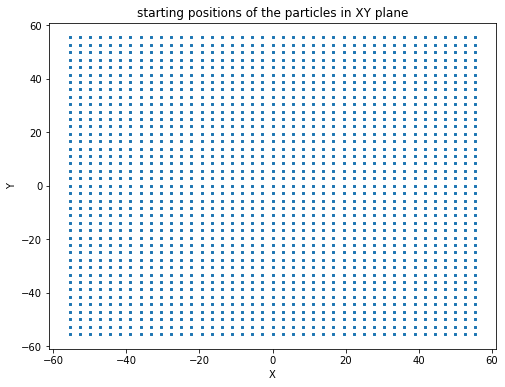

In [39]:
#look at data!
fig = plt.figure(figsize=(8, 6))

plt.scatter(datainit['x'].values, datainit['y'].values, s = 5, marker = '.')
plt.title('starting positions of the particles in XY plane')
plt.xlabel('X')
plt.ylabel('Y')

100%|██████████| 1000/1000 [00:01<00:00, 788.01it/s]


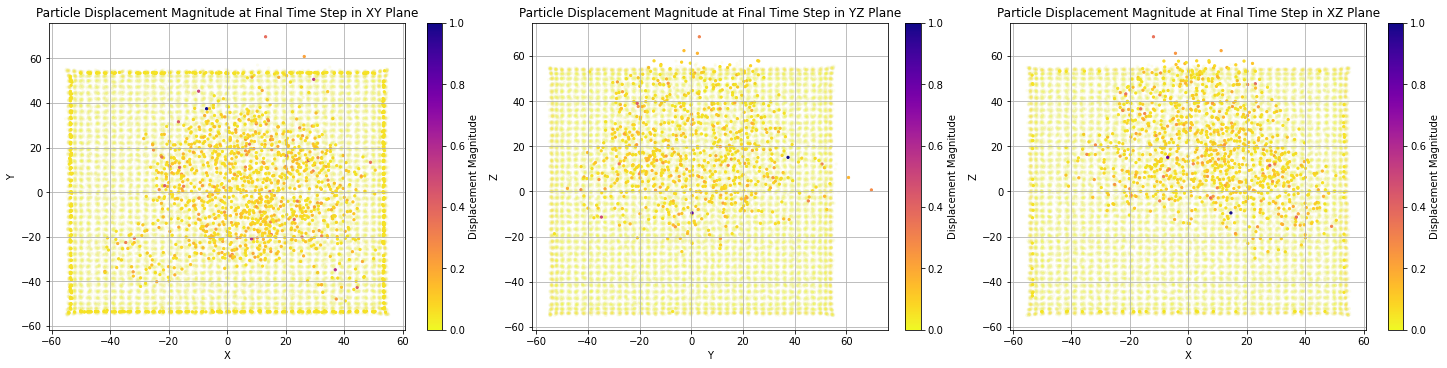

In [40]:
def normalize_array(arr):
    return (arr - arr.min()) / (arr.max() - arr.min()) #normalize colorbars to 0,1 scale

displacements = [
    ('x', 'y', np.sqrt(datafinal['dx']**2 + datafinal['dy']**2), 'XY Plane', 'X', 'Y'),
    ('y', 'z', np.sqrt(datafinal['dy']**2 + datafinal['dz']**2), 'YZ Plane', 'Y', 'Z'),
    ('x', 'z', np.sqrt(datafinal['dx']**2 + datafinal['dz']**2), 'XZ Plane', 'X', 'Z'),]

fig, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)

for ax, (axis1, axis2, value, title, xlabel, ylabel) in zip(axes, displacements):
    for _ in tqdm(range(1000)): 
        value_norm = normalize_array(value)
        datafinal['displacement_magnitude'] = value_norm

        cmap = plt.cm.plasma_r
        norm = plt.Normalize(vmin=datafinal['displacement_magnitude'].min(), vmax=datafinal['displacement_magnitude'].max())
        colors = cmap(norm(datafinal['displacement_magnitude']))
        alpha_values = np.where(datafinal['displacement_magnitude'] < 0.05, 0.05, 1.0) #to make undisturbed particles transparent
        colors[:, -1] = alpha_values

    scatter = ax.scatter(datafinal[axis1], datafinal[axis2], color=colors, s=5)
    ax.set_title(f'Particle Displacement Magnitude at Final Time Step in {title}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('Displacement Magnitude')

In [46]:
#get the differences of the number of neighbors from first timestep to last timestep
neighbor_tot = data['neighbor'].values
neighbor_init = datainit['neighbor'].values
neighbor_final = datafinal['neighbor'].values

neighbor_change = neighbor_final - neighbor_init
datafinal['final neighbors'] = neighbor_change

def classify_neighbor_change(value):
    if value > 2.0:
        return "interstitial"
    elif value < -2.0:
        return "vacancy"
    else:
        return "no change"

datafinal['classify'] = datafinal['final neighbors'].apply(classify_neighbor_change)
datafinal
print(len(datafinal[datafinal['classify'] == 'interstitial']))
print(len(datafinal[datafinal['classify'] == 'vacancy']))

184
12753


100%|██████████| 1000/1000 [00:02<00:00, 490.18it/s]


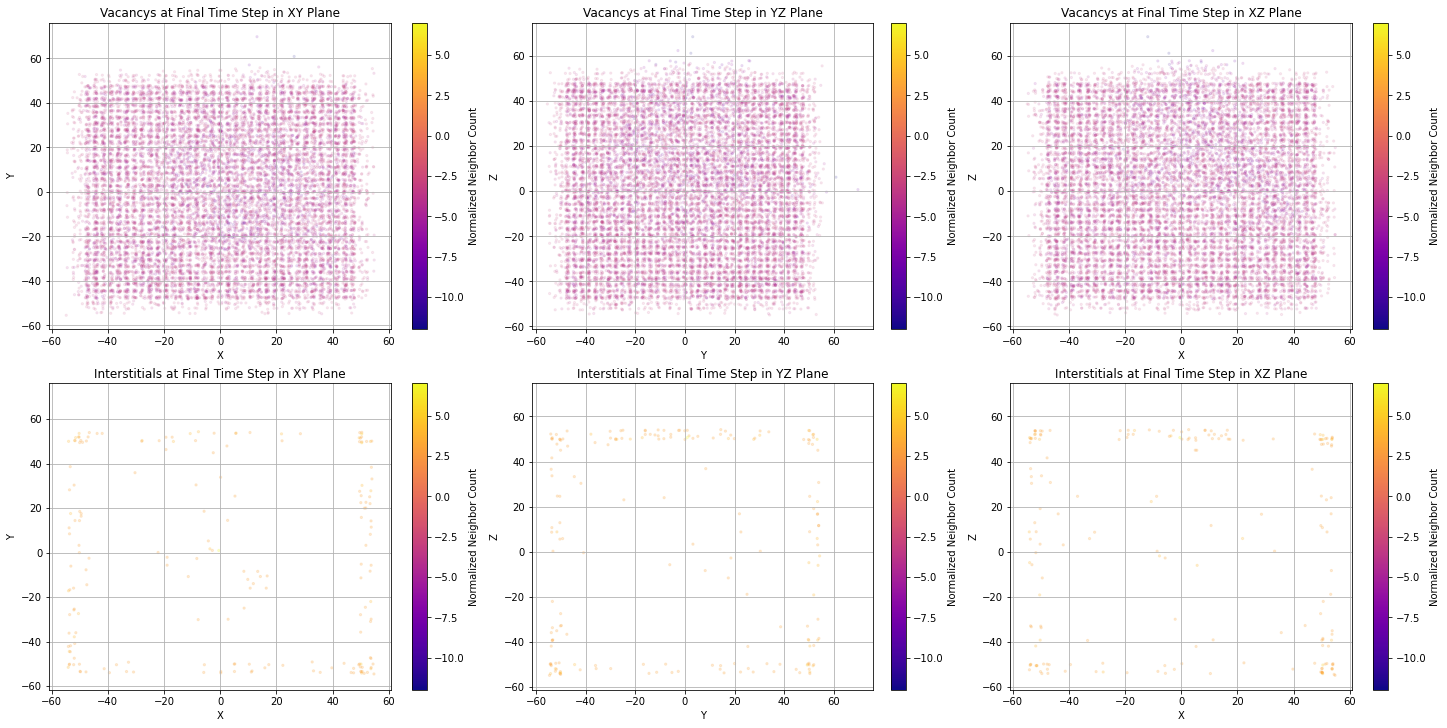

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), constrained_layout=True)

neighbor_final_norm = normalize_array(neighbor_change)

# Iterate over the displacements for each plot type
for row, particle_type in enumerate(['vacancy', 'interstitial']):
    for ax, (axis1, axis2, value, title, xlabel, ylabel) in zip(axes[row], displacements):
        for _ in tqdm(range(1000)): 
            cmap = plt.cm.plasma
            norm = plt.Normalize(vmin=neighbor_change.min(), vmax=neighbor_change.max())  
            colors = cmap(neighbor_final_norm)
            
            alpha_values = np.where(datafinal['classify'] == particle_type, 0.1 if particle_type == 'vacancy' else 0.2, 0.0)
            colors[:, -1] = alpha_values

        scatter = ax.scatter(datafinal[axis1], datafinal[axis2], color=colors, s=5)
        ax.set_title(f'{particle_type.capitalize()}s at Final Time Step in {title}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(True)

        cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
        cbar.set_label('Normalized Neighbor Count')

In [9]:
luis = pd.read_csv('EAM.Au.Ga.LAMMPS.txt', header = None)
database = pd.read_csv('Au_GLJ10_3.eam.alloy.txt', header = None)
new = pd.read_csv('Au_Olsson_JAP2010.eam.alloy.txt', header = None)

luisx, luisy = np.arange(0, 35000, 1), np.array(luis.values).reshape(35000,)
luisx = np.array(luisx, dtype=float)
luisy = np.array(luisy, dtype=float)
databasex, databasey = np.arange(0, 30003, 1), np.array(database.values).reshape(30003,)
databasex, databasey = np.array(databasex, dtype=float), np.array(databasey, dtype=float)

newx, newy = np.arange(0, 30000, 1), np.array(new.values).reshape(30000)
newx, newy = np.array(newx, dtype = float), np.array(newy, dtype = float)

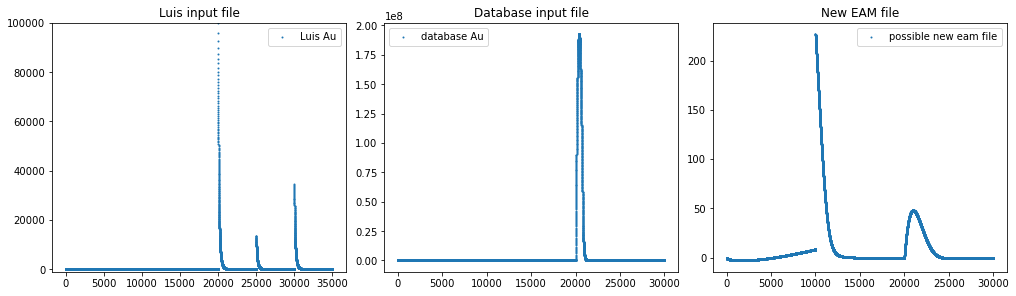

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), constrained_layout=True)

axes[0].scatter(luisx, luisy, label = 'Luis Au', s = 1)
axes[0].set_ylim(-1000, 1e5)
axes[1].scatter(databasex, databasey, label = 'database Au', s = 1)
axes[2].scatter(newx, newy, label = 'possible new eam file', s = 1)
axes[0].set_title('Luis input file')
axes[1].set_title('Database input file')
axes[2].set_title('New EAM file')
axes[0].legend(loc = 'best')
axes[1].legend(loc = 'best')
axes[2].legend(loc = 'best')